In [2]:
import torch
import xgboost
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV


In [3]:
full_df = pd.read_csv('../data_vt/vt_dataset_rev.csv')
full_y = full_df[['Vgs']].to_numpy()
full_X = full_df[['W','L','T','Vds']].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(full_X, full_y, test_size=0.2)
xgb_model = xgboost.XGBRegressor()
parameters = {'booster' :['gbtree'],
                 'silent':[True],
                 'max_depth':[5,6,8],
                 'min_child_weight':[1,3,5],
                 'gamma':[0,1,2,3],
                 'nthread':[4],
                 'colsample_bytree':[0.5,0.8],
                 'colsample_bylevel':[0.9],
                 'n_estimators':[50],
                 'objective':['reg:linear'],
                 'random_state':[2]}

xgb_grid = GridSearchCV(xgb_model,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

print(len(X_train), len(X_test))
xgb_grid.fit(X_train,y_train)
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

345 87
Fitting 2 folds for each of 72 candidates, totalling 144 fits
[14:17:40] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:17:40] WARNING: ../src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:17:40] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:17:40] WARNING: ../src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you fi

In [4]:
# xgb_model = xgboost.XGBRegressor(colsample_bytree=0.7, learning_rate=0.07, max_depth=5, min_child_weight=4, n_estimators=500, nthread=4, objective='reg:linear', silent=1, subsample=0.7)
# xgb_model = xgb_grid.best_estimator_
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

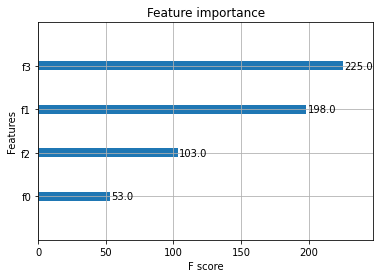

In [5]:
xgboost.plot_importance(xgb_model)

In [6]:
X_test

array([[2.0e+01, 8.0e+00, 2.5e+01, 1.0e+00],
       [1.0e+02, 8.0e+00, 8.0e+01, 1.0e+01],
       [5.0e+01, 8.0e+00, 2.5e+01, 2.0e+01],
       [5.0e+01, 1.2e+01, 2.5e+01, 1.0e+00],
       [1.0e+02, 1.2e+01, 0.0e+00, 2.0e+01],
       [1.0e+02, 1.2e+01, 2.5e+01, 1.0e-01],
       [1.0e+02, 1.0e+01, 0.0e+00, 3.0e+01],
       [1.0e+01, 5.0e+00, 2.5e+01, 3.0e+01],
       [5.0e+01, 8.0e+00, 2.5e+01, 3.0e+01],
       [3.5e+01, 8.0e+00, 8.0e+01, 5.0e+00],
       [1.0e+02, 5.0e+00, 0.0e+00, 1.0e+01],
       [1.0e+03, 1.2e+01, 2.5e+01, 1.0e-01],
       [1.0e+01, 1.2e+01, 8.0e+01, 1.0e-01],
       [1.0e+03, 1.2e+01, 0.0e+00, 1.0e+01],
       [1.0e+03, 8.0e+00, 2.5e+01, 1.0e+01],
       [5.0e+01, 5.0e+00, 2.5e+01, 2.0e+01],
       [1.0e+03, 8.0e+00, 0.0e+00, 3.0e+01],
       [3.5e+01, 1.2e+01, 0.0e+00, 5.0e+00],
       [2.0e+01, 5.0e+00, 8.0e+01, 1.0e+00],
       [1.0e+02, 8.0e+00, 0.0e+00, 3.0e+01],
       [3.5e+01, 5.0e+00, 0.0e+00, 3.0e+01],
       [1.0e+01, 5.0e+00, 2.5e+01, 1.0e+00],
       [1.

In [7]:
predictions = xgb_model.predict(X_test)
predictions

array([8.0053508e-01, 5.9719580e-01, 5.9970611e-01, 7.9967308e-01,
       6.0007328e-01, 9.9999869e-01, 5.9971923e-01, 5.2492431e-04,
       4.0011796e-01, 6.1295241e-01, 5.9966910e-01, 9.9999869e-01,
       1.1981766e+00, 8.0012965e-01, 6.0018981e-01, 4.0002382e-01,
       4.0011796e-01, 8.0233002e-01, 6.0218203e-01, 4.0011796e-01,
       4.8234899e-04, 5.9904730e-01, 5.9966910e-01, 5.2492431e-04,
       8.0149657e-01, 5.9904730e-01, 9.9991995e-01, 8.0231929e-01,
       8.0233002e-01, 4.0769056e-04, 3.9950824e-01, 1.0017474e+00,
       7.9951674e-01, 8.0753541e-01, 7.9397011e-01, 5.9957343e-01,
       4.8234899e-04, 6.0045826e-01, 5.9780318e-01, 6.3209748e-01,
       5.9964198e-01, 3.9995125e-01, 5.9771365e-01, 5.9787291e-01,
       5.9904522e-01, 5.9992748e-01, 4.0002382e-01, 8.0049658e-01,
       1.1978942e+00, 8.0231929e-01, 5.9982717e-01, 7.9901099e-01,
       6.0007328e-01, 8.0066609e-01, 5.9972060e-01, 6.0095137e-01,
       5.9939677e-01, 3.9995125e-01, 6.0007745e-01, 6.0034037e

In [8]:
y_test.flatten()

array([ 8.0000e-01,  6.0000e-01,  6.0000e-01,  8.0000e-01,  6.0000e-01,
        1.0000e+00,  6.0000e-01, -3.7581e-14,  4.0000e-01,  6.0000e-01,
        6.0000e-01,  1.0000e+00,  1.2000e+00,  8.0000e-01,  6.0000e-01,
        4.0000e-01,  4.0000e-01,  8.0000e-01,  6.0000e-01,  4.0000e-01,
       -3.7581e-14,  6.0000e-01,  6.0000e-01, -3.7581e-14,  8.0000e-01,
        6.0000e-01,  1.0000e+00,  8.0000e-01,  8.0000e-01, -3.7581e-14,
        4.0000e-01,  1.0000e+00,  8.0000e-01,  8.0000e-01,  8.0000e-01,
        6.0000e-01, -3.7581e-14,  6.0000e-01,  6.0000e-01,  6.0000e-01,
        6.0000e-01,  4.0000e-01,  6.0000e-01,  6.0000e-01,  6.0000e-01,
        6.0000e-01,  4.0000e-01,  8.0000e-01,  1.2000e+00,  8.0000e-01,
        6.0000e-01,  8.0000e-01,  6.0000e-01,  8.0000e-01,  6.0000e-01,
        6.0000e-01,  6.0000e-01,  4.0000e-01,  6.0000e-01,  6.0000e-01,
        8.0000e-01,  6.0000e-01,  6.0000e-01,  6.0000e-01,  6.0000e-01,
        6.0000e-01,  1.2000e+00,  8.0000e-01,  6.0000e-01,  8.00

In [9]:
r_sq = xgb_model.score(X_train, y_train)
print(r_sq)
print(explained_variance_score(predictions,y_test))

0.9999672888268648
0.999721508445563


In [10]:
xgb_model.save_model('vt_xgboost_model.model')